In [ ]:
#Marsha Gomez Gomez
#MIRCV 2021
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install opencv-python==4.4.0.46

     |████████████████████████████████| 49.5MB 87kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display, clear_output
from imutils.video import VideoStream, FileVideoStream


BASE_DIR = '/content/gdrive/My Drive/mircv2021'
IMG_DIR = BASE_DIR + '/data/lf_img'

MIN_GOOD_MATCHES = 15


print("Done Configuration")

Done Configuration


In [ ]:
def display_img(img, is_bgr=True):
  if is_bgr:  # convert color from CV2 BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
  display(Image.fromarray(img))
  clear_output(wait=True)

print("Set display_img Function")

Set display_img Function


In [ ]:
#TODO
img = cv2.imread(IMG_DIR + '/figure-at-a-window.jpg')

#Initialize ORB
orb = cv2.ORB_create()
#Extract ORB keypoints and features from img
kps = orb.detect(img, None)

print(len(kps))

for kp in kps:
  print(kp.pt)
  print(kp.angle)
  print(kp.size)


des = orb.compute(img,kps)

print("Finish the initialize")

500
(261.0, 389.0)
189.3764190673828
31.0
(297.0, 314.0)
201.3227996826172
31.0
(102.0, 401.0)
315.37554931640625
31.0
(299.0, 312.0)
221.8370819091797
31.0
(100.0, 402.0)
328.6019287109375
31.0
(281.0, 312.0)
287.7388916015625
31.0
(129.0, 359.0)
244.47921752929688
31.0
(282.0, 315.0)
293.1383972167969
31.0
(226.0, 560.0)
35.17926788330078
31.0
(237.0, 285.0)
118.75953674316406
31.0
(298.0, 214.0)
358.9054260253906
31.0
(300.0, 216.0)
9.362565994262695
31.0
(300.0, 266.0)
357.6917724609375
31.0
(121.0, 360.0)
197.3623504638672
31.0
(311.0, 216.0)
178.2200927734375
31.0
(306.0, 367.0)
261.68511962890625
31.0
(108.0, 217.0)
131.57318115234375
31.0
(238.0, 288.0)
123.52289581298828
31.0
(287.0, 218.0)
135.6349639892578
31.0
(129.0, 369.0)
227.80767822265625
31.0
(311.0, 162.0)
157.62852478027344
31.0
(188.0, 369.0)
2.427457809448242
31.0
(240.0, 284.0)
105.72827911376953
31.0
(296.0, 166.0)
94.19200897216797
31.0
(299.0, 166.0)
72.23316955566406
31.0
(130.0, 361.0)
246.33824157714844
31.

Image Keypoints


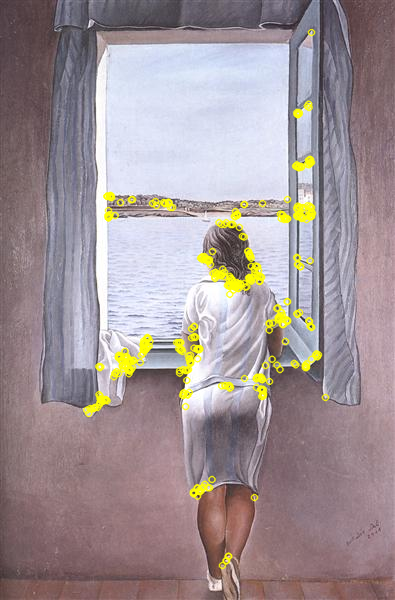

In [ ]:
#TODO
#Draw keypoints
out = None
out = cv2.drawKeypoints(img, kps, None, (0,255,255), cv2.DRAW_MATCHES_FLAGS_DEFAULT)

print('Image Keypoints')
display_img(out)

Image Rich Keypoints


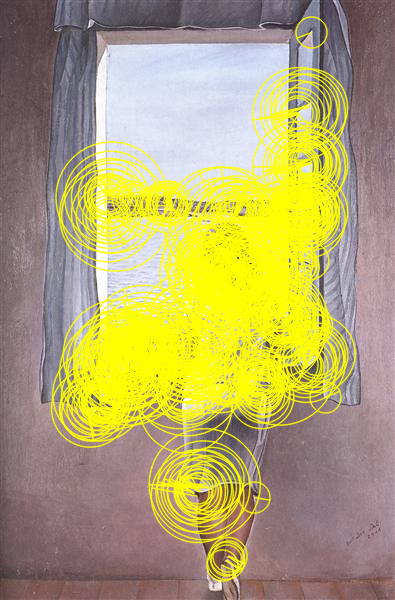

In [ ]:
#TODO
#Draw rich keypoints
out = None
out = cv2.drawKeypoints(img, kps, None, (0,255,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


print('Image Rich Keypoints')
display_img(out)

Matches 174
Features Matching


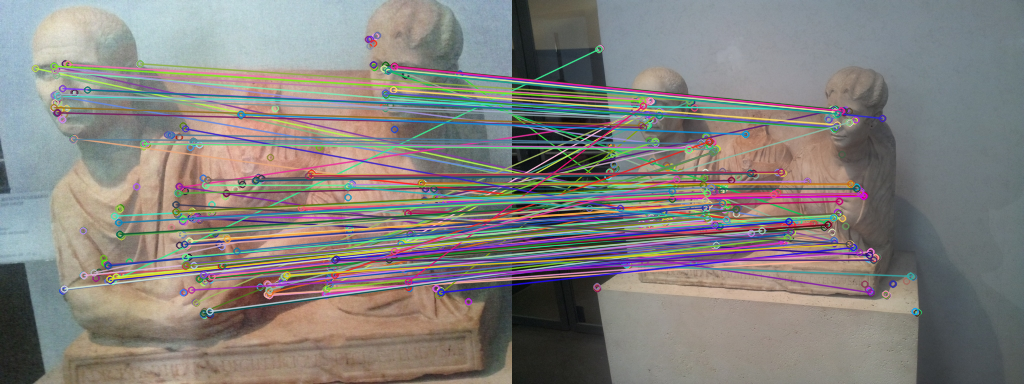

In [ ]:
#TODO
img1 = cv2.imread(IMG_DIR + '/2014-05-14 14.52.14.jpg')
img2 = cv2.imread(IMG_DIR + '/20140512_105751.jpg')

#Extract ORB keypoints and features from img1 and img2
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

#Initialize matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

#match features
matches = bf.match(des1, des2)
print("Matches", len(matches))

# matches = sorted(matches, key = lambda x:x.distance)

#Draw matches
# img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None)
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches, None)
print('Features Matching')
display_img(img_matches)

In [ ]:
#TODO
#Set a good threshold
# Less the distance = Better

for match in matches:
  print(match.distance)

49.0
55.0
51.0
44.0
65.0
48.0
69.0
68.0
58.0
53.0
56.0
56.0
44.0
61.0
69.0
71.0
68.0
56.0
70.0
60.0
45.0
68.0
65.0
64.0
55.0
56.0
62.0
71.0
66.0
68.0
52.0
45.0
75.0
41.0
47.0
53.0
41.0
46.0
33.0
23.0
51.0
56.0
50.0
59.0
42.0
59.0
33.0
55.0
29.0
42.0
37.0
60.0
49.0
49.0
43.0
49.0
38.0
26.0
69.0
51.0
29.0
19.0
24.0
34.0
35.0
15.0
28.0
32.0
52.0
30.0
40.0
28.0
37.0
24.0
48.0
43.0
52.0
30.0
37.0
42.0
27.0
70.0
24.0
53.0
61.0
38.0
50.0
64.0
32.0
47.0
22.0
49.0
56.0
27.0
23.0
34.0
40.0
39.0
58.0
46.0
33.0
23.0
39.0
30.0
7.0
37.0
27.0
35.0
35.0
50.0
65.0
44.0
35.0
60.0
35.0
31.0
53.0
30.0
36.0
23.0
49.0
39.0
29.0
43.0
27.0
32.0
31.0
51.0
39.0
38.0
33.0
28.0
55.0
44.0
37.0
48.0
42.0
42.0
42.0
36.0
46.0
51.0
47.0
65.0
36.0
53.0
38.0
33.0
55.0
51.0
48.0
48.0
54.0
52.0
50.0
54.0
37.0
56.0
58.0
51.0
55.0
65.0
37.0
41.0
41.0
74.0
60.0
36.0
52.0
47.0
63.0
65.0
62.0
32.0


Filtered Matching


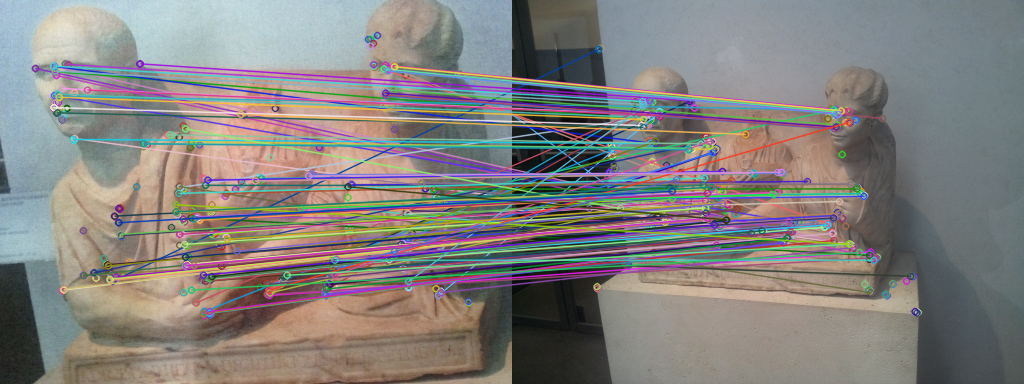

In [ ]:
THRESHOLD = 100

#Filter good matches
good = [m for m in matches if m.distance <= THRESHOLD]
#Draw good matches
good_matches = cv2.drawMatches(img1,kp1, img2, kp2, good, None)
print('Filtered Matching')
display_img(good_matches)

In [ ]:
def add_bounding_box(img1,kp1, img2,kp2,goodP, M, mask, draw_inliers=False):
  matchesMask = mask.ravel().tolist()
  h, w, c = img1.shape
  pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
  dst = cv2.perspectiveTransform(pts, M)

  img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

  if draw_inliers:
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)
    return cv2.drawMatches(img1,kp1,img2,kp2,goodP,None,**draw_params)
  return img2

print("Done add Bounding Box")

Done add Bounding Box


174
Ransac


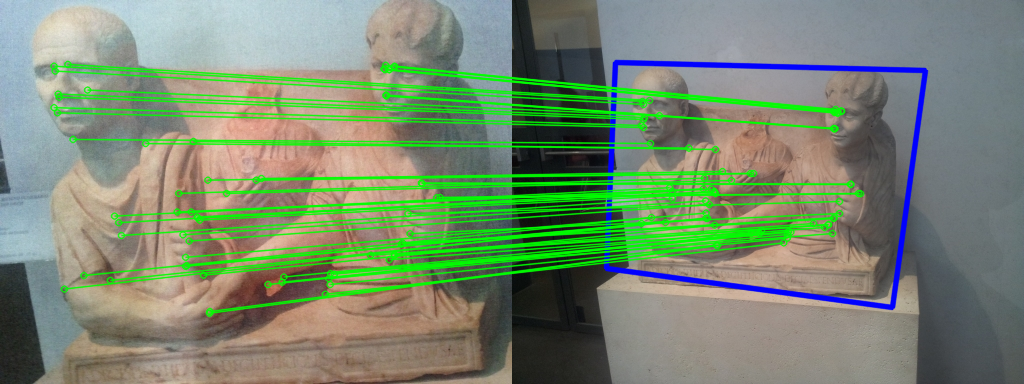

In [ ]:
#TODO
#Select the points of the best matches
if len(good) > MIN_GOOD_MATCHES:
  print(len(good))
  src_pts = np.float32([kp1[m.queryIdx].pt for m in good])
  dst_pts = np.float32([kp2[m.trainIdx].pt for m in good])

#find homography
  M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 1.0)
  ransac_img = add_bounding_box(img1, kp1, img2, kp2, good, M, mask, True)
  print('Ransac')
  display_img(ransac_img)
else:
  print ("Not enough matches are found - %d/%d" % (len(good), MIN_GOOD_MATCHES))

In [ ]:
#From https://github.com/juangallostra/augmented-reality

import math

class OBJ:
    def __init__(self, filename, swapyz=False):
        """Loads a Wavefront OBJ file. """
        self.vertices = []
        self.normals = []
        self.texcoords = []
        self.faces = []
        material = None
        for line in open(filename, "r"):
            if line.startswith('#'): continue
            values = line.split()
            if not values: continue
            if values[0] == 'v':
                v = list(map(float, values[1:4]))
                if swapyz:
                    v = v[0], v[2], v[1]
                self.vertices.append(v)
            elif values[0] == 'vn':
                v = list(map(float, values[1:4]))
                if swapyz:
                    v = v[0], v[2], v[1]
                self.normals.append(v)
            elif values[0] == 'vt':
                self.texcoords.append(map(float, values[1:3]))
            #elif values[0] in ('usemtl', 'usemat'):
                #material = values[1]
            #elif values[0] == 'mtllib':
                #self.mtl = MTL(values[1])
            elif values[0] == 'f':
                face = []
                texcoords = []
                norms = []
                for v in values[1:]:
                    w = v.split('/')
                    face.append(int(w[0]))
                    if len(w) >= 2 and len(w[1]) > 0:
                        texcoords.append(int(w[1]))
                    else:
                        texcoords.append(0)
                    if len(w) >= 3 and len(w[2]) > 0:
                        norms.append(int(w[2]))
                    else:
                        norms.append(0)
                #self.faces.append((face, norms, texcoords, material))
                self.faces.append((face, norms, texcoords))


def projection_matrix(camera_parameters, homography):
  """
  From the camera calibration matrix and the estimated homography
  compute the 3D projection matrix
  """
  # Compute rotation along the x and y axis as well as the translation
  homography = homography * (-1)
  rot_and_transl = np.dot(np.linalg.inv(camera_parameters), homography)
  col_1 = rot_and_transl[:, 0]
  col_2 = rot_and_transl[:, 1]
  col_3 = rot_and_transl[:, 2]
  # normalise vectors
  l = math.sqrt(np.linalg.norm(col_1, 2) * np.linalg.norm(col_2, 2))
  rot_1 = col_1 / l
  rot_2 = col_2 / l
  translation = col_3 / l
  # compute the orthonormal basis
  c = rot_1 + rot_2
  p = np.cross(rot_1, rot_2)
  d = np.cross(c, p)
  rot_1 = np.dot(c / np.linalg.norm(c, 2) + d / np.linalg.norm(d, 2), 1 / math.sqrt(2))
  rot_2 = np.dot(c / np.linalg.norm(c, 2) - d / np.linalg.norm(d, 2), 1 / math.sqrt(2))
  rot_3 = np.cross(rot_1, rot_2)
  # finally, compute the 3D projection matrix from the model to the current frame
  projection = np.stack((rot_1, rot_2, rot_3, translation)).T
  return np.dot(camera_parameters, projection)


def render(img, obj, projection, model, color=False):
    vertices = obj.vertices
    scale_matrix = np.eye(3) * 3
    h, w, c = model.shape

    for face in obj.faces:
        face_vertices = face[0]
        points = np.array([vertices[vertex - 1] for vertex in face_vertices])
        points = np.dot(points, scale_matrix)
        # render model in the middle of the reference surface. To do so,
        # model points must be displaced
        points = np.array([[p[0] + w / 2, p[1] + h / 2, p[2]] for p in points])
        dst = cv2.perspectiveTransform(points.reshape(-1, 1, 3), projection)
        imgpts = np.int32(dst)
        if color is False:
            cv2.fillConvexPoly(img, imgpts, (137, 27, 211))
        else:
            color = hex_to_rgb(face[-1])
            color = color[::-1] # reverse
            cv2.fillConvexPoly(img, imgpts, color)

    return img

print("Done")

Done


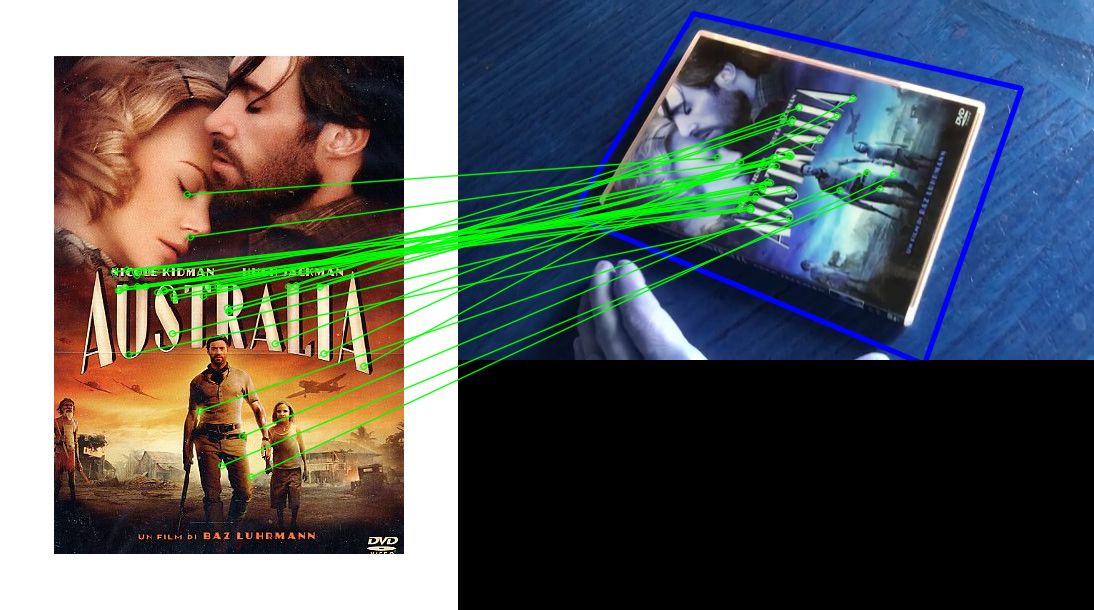

186
Ransac Video
Buffered data was truncated after reaching the output size limit.

In [ ]:
#TODO WITH ALL THE POINTS MATCH

VIDEO_SRC = IMG_DIR + '/australia.mp4'
CAMERA_SRC = 0
FRAMES_TO_SKIP = 5
OBJECT_IMG = IMG_DIR + '/australia.jpg'
MIN_RANSAC_INLIERS = 12

# TODO 
# read the query image OBJECT_IMG
img_q = cv2.imread(OBJECT_IMG)

# detect keypoints and extract features from query image
kp_q, des_q = orb.detectAndCompute(img_q,mask = None)

frame_count = 0

#vs = VideoStream(src=0).start() #webcam
vs = FileVideoStream(VIDEO_SRC).start()
camera_parameters = np.array([[800, 0, 320], [0, 800, 240], [0, 0, 1]])
obj = OBJ(BASE_DIR + '/data/models/fox.obj', swapyz=True)

# loop over frames from the video file stream
while vs.more():

    # grab the frame from the threaded video stream
    frame = vs.read()

    if frame_count % FRAMES_TO_SKIP == 0:
      frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

      # TODO
      # detect keypoints and extract features from frame
      kp_v, des_v = orb.detectAndCompute(frame,mask = None)

      # match feautures with query
      matches_frame = bf.match(des_q, des_v)

      # select the good matches
      good_v = [m for m in matches_frame if m.distance <= THRESHOLD]

      # ransac & findHomography
      #Select the points of the best matches
      if len(good_v) > MIN_GOOD_MATCHES:
        print(len(good_v))
        src_v = np.float32([kp_q[m.queryIdx].pt for m in good_v])
        dst_v = np.float32([kp_v[m.trainIdx].pt for m in good_v])

      #find homography
        M_v, mask_v = cv2.findHomography(src_v, dst_v, cv2.RANSAC, 1.0)
        ransac_img_v = add_bounding_box(img_q, kp_q, frame, kp_v, good_v, M_v, mask_v, True)
        print('Ransac Video')
        display_img(ransac_img_v)

        projection = projection_matrix(camera_parameters, M_v)
        frame = render(ransac_img_v, obj, projection, img_q, False)
      else:
        print ("Not enough matches are found - %d/%d" % (len(good), MIN_GOOD_MATCHES))
      # show image with Homography and bounding box
    frame_count += 1




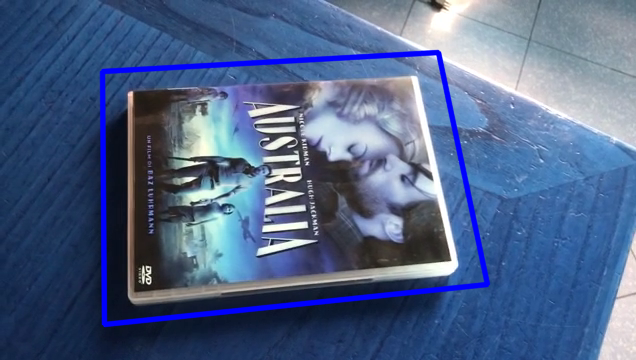

In [15]:
#TODO WITHOUT POINT MATCH 

VIDEO_SRC = IMG_DIR + '/australia.mp4'
CAMERA_SRC = 0
FRAMES_TO_SKIP = 5
OBJECT_IMG = IMG_DIR + '/australia.jpg'
MIN_RANSAC_INLIERS = 12
THRESHOLD_F = 35

# TODO 
# read the query image OBJECT_IMG
imgQ = cv2.imread(OBJECT_IMG)

# detect keypoints and extract features from query image
kpQ, desQ = orb.detectAndCompute(imgQ, None)


frame_count = 0
#vs = VideoStream(src=0).start() #webcam
vs = FileVideoStream(VIDEO_SRC).start()


# loop over frames from the video file stream
while vs.more():
    # grab the frame from the threaded video stream
    frame = vs.read()
    if frame_count % FRAMES_TO_SKIP == 0:
      frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

      # TODO
      # detect keypoints and extract features from frame
      kpF, desF = orb.detectAndCompute(frame, None)

      # match feautures with query
      matchesF = bf.match(desQ, desF)
      matchesF = sorted(matchesF, key = lambda x:x.distance)

      # select the good matches
      goodF = [m for m in matchesF if m.distance<=THRESHOLD_F]

      # ransac & findHomography
      if len(goodF) > MIN_GOOD_MATCHES:
        #print(len(goodF))
        src_ptsF = np.float32([kpQ[m.queryIdx].pt for m in goodF])
        dst_ptsF = np.float32([kpF[m.trainIdx].pt for m in goodF])
        #print(src_ptsF.shape)
        #find homography
        MF, maskF = cv2.findHomography(src_ptsF, dst_ptsF, cv2.RANSAC, 1.0)
        ransac_img_F = add_bounding_box(imgQ, kpQ, frame, kpF, goodF, MF, maskF, False)
        #print('Ransac')
        display_img(ransac_img_F)
      else:
        print ("Not enough matches are found - %d/%d" % (len(goodF), MIN_GOOD_MATCHES))
      # show image with Homography and bounding box
    frame_count += 1

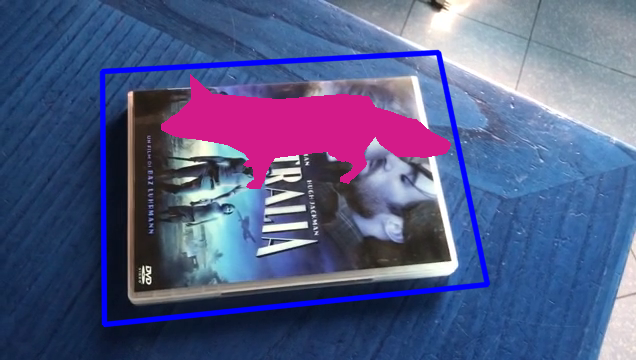

In [17]:
#TODO WITH 3D OUTPUT

VIDEO_SRC = IMG_DIR + '/australia.mp4'
CAMERA_SRC = 0
FRAMES_TO_SKIP = 5
OBJECT_IMG = IMG_DIR + '/australia.jpg'
MIN_RANSAC_INLIERS = 12

# TODO 
# read the query image OBJECT_IMG
img_q = cv2.imread(OBJECT_IMG)

# detect keypoints and extract features from query image
kp_q, des_q = orb.detectAndCompute(img_q,mask = None)

frame_count = 0

#vs = VideoStream(src=0).start() #webcam
vs = FileVideoStream(VIDEO_SRC).start()
camera_parameters = np.array([[800, 0, 320], [0, 800, 240], [0, 0, 1]])
obj = OBJ(BASE_DIR + '/data/models/fox.obj', swapyz=True)

# loop over frames from the video file stream
while vs.more():

    # grab the frame from the threaded video stream
    frame = vs.read()

    if frame_count % FRAMES_TO_SKIP == 0:
      frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

      # TODO
      # detect keypoints and extract features from frame
      kpF, desF = orb.detectAndCompute(frame, None)

      # match feautures with query
      matchesF = bf.match(desQ, desF)
      matchesF = sorted(matchesF, key = lambda x:x.distance)

      # select the good matches
      goodF = [m for m in matchesF if m.distance<=THRESHOLD_F]

      # ransac & findHomography
      if len(goodF) > MIN_GOOD_MATCHES:
        #print(len(goodF))
        src_ptsF = np.float32([kpQ[m.queryIdx].pt for m in goodF])
        dst_ptsF = np.float32([kpF[m.trainIdx].pt for m in goodF])
        #print(src_ptsF.shape)

        #find homography
        MF, maskF = cv2.findHomography(src_ptsF, dst_ptsF, cv2.RANSAC, 1.0)
        ransac_img_F = add_bounding_box(imgQ, kpQ, frame, kpF, goodF, MF, maskF, False)
        #print('Ransac')
        projection = projection_matrix(camera_parameters, MF)
        frame = render(ransac_img_F, obj, projection, imgQ, False)
        display_img(ransac_img_F)
      else:
        print ("Not enough matches are found - %d/%d" % (len(goodF), MIN_GOOD_MATCHES))
      # show image with Homography and bounding box
    frame_count += 1





